<a href="https://colab.research.google.com/github/ErickMM98/NetworkAnalysis_TwitterTrends/blob/main/NetworkAnalysis_TwitterTrends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Funciones básicas**

In [119]:
import tarfile
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import datetime as dt
import collections

#GENERAL VALUES (secret values to public)

path_main_drive = "/content/drive/My Drive/NetworkAnalysis_TwitterTrends/virality2013.tar.gz"
path_friends_followers = "/content/follower_gcc.anony.dat"
path_tweets_users = "/content/timeline_tag.anony.dat"
path_retweets_users = "/content/timeline_tag_rt.anony.dat"
path_mentions_users = "/content/timeline_tag_men.anony.dat"

def extract_file_from_drive():
  """
  Function to extract all the data files.
  Just for the first time. 
  """
  my_tar = tarfile.open(path_main_drive)
  my_tar.extractall('//content')
  my_tar.close()  

def get_data_followers_and_friends():
  """
  Function to get a dataframe for the file with 
  the basic relation of mutual follow.

  return @Dataframe 
  """
  data = pd.read_csv(path_friends_followers,
                     sep=' ',
                     #nrows = 10000000,
                     names=['source', 'target'])
  return data

def get_data_tweets_time():
  """
  Function to get a dataframe for the file with 
  the basic relation of mutual follow.

  return @Dataframe 
  """
  data = pd.read_csv(path_tweets_users,
                     sep=' ',
                     nrows = 100)
                     #names=['source', 'target'])
  return data


def get_data_retweets_time():
  """
  Function to get a dataframe for the file with 
  the basic relation of mutual follow.

  return @Dataframe 
  """
  pass

def get_data_mentions_time():
  """
  Function to get a dataframe for the file with 
  the basic relation of mutual follow.

  return @Dataframe 
  """
  pass

def givehour(timestamp):
    day_string = timestamp.hour
    return day_string

def giveday(timestamp):
    day_string = timestamp.dayofyear
    return day_string

"""
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
------------------------ Plot beauty networks ---------------------------------
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
"""


def plot_social_network():
  """
  Function to plot fancy social network
  """
  #nx.



#Only for open sesion
#extract_file_from_drive()


##Con esto podemos leer todo c:

ntweets = 4000
all_tweets = None
name_all_hastag = {}
with open(path_tweets_users, 'r') as reader:
  namehashatag = None
  for line in reader:
    list_tweets = line.split()
    namehashatag = list_tweets[0]
    count_tw = len(list_tweets) - 1
    if count_tw >  ntweets:
      name_all_hastag[namehashatag] = list_tweets

# **Métricas**


In [94]:
def entropy_of_graph(G):
  """
  Function to get the entropy of a graph

  G : @nx.Graph A graph non directed

  return @float The entropy of the graph G
  """
  degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
  N = G.number_of_nodes()
  if N == 0:
    return 0
  degreeCount = list(dict(collections.Counter(degree_sequence)).values())
  vectorprobs = 1/N * np.array(degreeCount)
  entropy =  np.sum(vectorprobs * np.log2(1/vectorprobs))
  return entropy

#**Grafica series de tiempo**

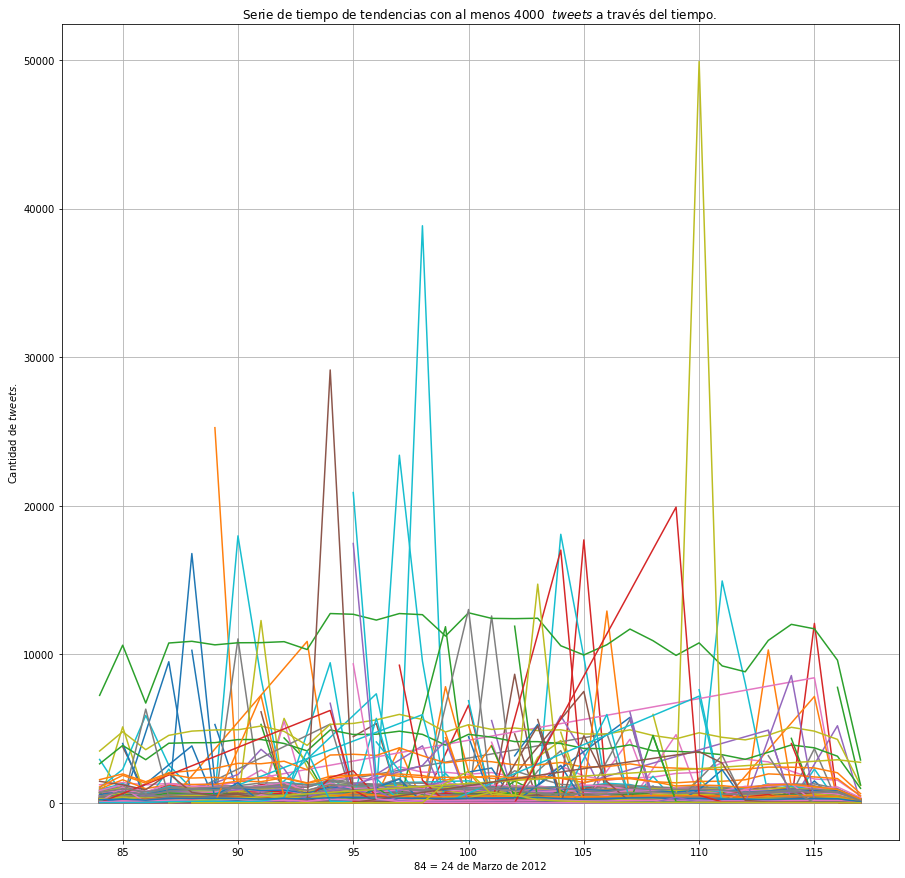

In [120]:
###### Data

yolodf = None
fig = plt.figure(figsize = (15,15))
for name_h in name_all_hastag:
  #wihtelist = ['wheniwaslittle', 'oomf','yolo','10factsaboutme','sorrynotsorry']
  wihtelist = ['oomf',
               'np',
               'nf',
               'ff',
               'teamfollowback',
               'bahrain',
               'rt',
               'thoughtsduringschool',
               'yolo',
               'dearoomf']
  #wihtelist = ['youvedoneittoo',
  #             'iwonderif',
  #             'weed',
  #             'truestory '
  #             'immadbecause',
  #             'butyouathug',
  #             'stfu',
  #             'bored',
  #             'ifweweretogetherrightnow',
  #             'icantlivewithout',
  #             'thatdepressingmoment']
  #wihtelist = ['yolo']
  #wihtelist = ['bored']

  #if name_h in wihtelist:
  if True:
    prueba = name_all_hastag[name_h]
    #del prueba[0]
    prueba = [ k.split(',') for k in prueba ]
    df_final = pd.DataFrame(prueba, columns = ['time','userid'])
    #path_final_csv = '/content/gen_csv/{}.csv'.format(name_h)
    #df_final.to_csv(path_or_buf=path_final_csv)
    df_final['time'] = pd.to_datetime(df_final['time'],unit='s')

    df_final['day'] = df_final['time'].apply(giveday)
    days = df_final.groupby('day')
    daycount = days['day'].count()
    timedict = daycount.to_dict()

    plt.plot(list(timedict.keys()), list(timedict.values()),
             label = "#{}; n = {}".format(name_h,
                                          np.sum(list(timedict.values()))))
    #plt.xticks(list(timedict.keys()), fontsize=15, rotation=90)
    #yolodf = df_final

plt.title("Serie de tiempo de tendencias con al menos 4000  $tweets$ a través del tiempo.")
plt.ylabel("Cantidad de $tweets$.")
plt.xlabel("84 = 24 de Marzo de 2012")
#plt.legend()
plt.grid()
#plt.show()
plt.savefig(fname = "/content/images/ts_tweets_allforall.pdf")  

# **Visualización de una tendencia**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

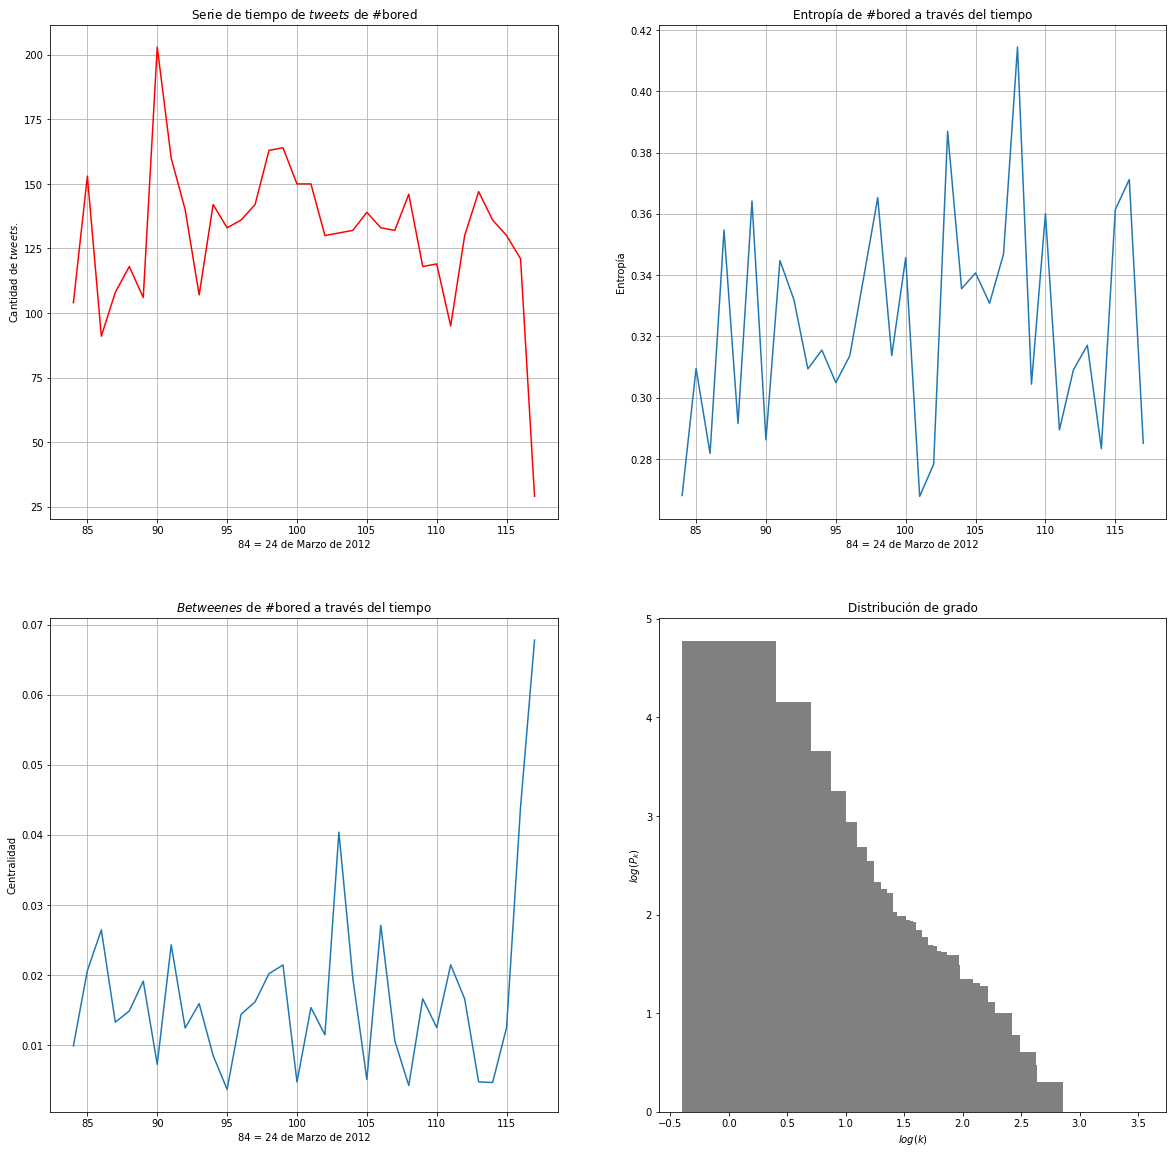

In [142]:
G_auxiliar = None

def get_plots_trend(name_trend):
  """
  Function to make a beauty presentation
  """
  ##### DATA SET

  xlabel_time = []
  entropy_time = []
  betweenes_time = []

  #### SERIE DE TIEMPO

  yolodf = None
  fig = plt.figure(figsize = (20,20))

  for name_h in name_all_hastag:
    if name_h == name_trend:
      prueba = name_all_hastag[name_h]
      prueba = [ k.split(',') for k in prueba ]
      df_final = pd.DataFrame(prueba, columns = ['time','userid'])
      df_final['time'] = pd.to_datetime(df_final['time'],unit='s')

      df_final['day'] = df_final['time'].apply(giveday)
      days = df_final.groupby('day')
      daycount = days['day'].count()
      timedict = daycount.to_dict()
      plt.subplot(221)
      plt.plot(list(timedict.keys()), list(timedict.values()),
              label = "#{}; n = {}".format(name_h,
                                            np.sum(list(timedict.values()))),
               color = "red")
      yolodf = df_final

  plt.title("Serie de tiempo de $tweets$ de #{}".format(name_trend))
  plt.ylabel("Cantidad de $tweets$.")
  plt.xlabel("84 = 24 de Marzo de 2012")
  plt.grid()



  #### ESTUDIO POR DIAS
  data_follow = get_data_followers_and_friends()
  user_study = np.unique(yolodf['userid'])
  days_study = np.unique(yolodf['day'])
  all_links_social_study = data_follow[data_follow['source'].isin(user_study)]
  for day in days_study:
    tweets_for_day = yolodf[yolodf['day'] == day]
    edge_links_day = data_follow[data_follow['source'].isin(tweets_for_day['userid'])]
    #Por hora
    tweets_for_day['hour'] = tweets_for_day['time'].apply(givehour)
    hours = tweets_for_day.groupby('hour')
    entropy_by_days = []
    betweenes_by_days = []
    for hour in np.unique(tweets_for_day['hour']):
      tweets_for_hour = tweets_for_day[tweets_for_day['hour'] == hour]
      edge_links_hour = edge_links_day[edge_links_day['source'].isin(tweets_for_hour['userid'])]

      #MAKE A GRAPH
      G_follow = nx.Graph()
      nx.from_pandas_edgelist(df = edge_links_hour,
                          source = 'source',
                          target = 'target',
                          create_using=G_follow)
      
      #RETURN DATETIME
      #oficial_time =  pd.Timedelta(day, unit = 'day') + pd.Timedelta(hour, unit = 'h')

      #oficial_time =  day + hour/24

      #Some metrics
      g_entropy = entropy_of_graph(G_follow)
      g_betweenes = 0
      try:
        g_betweenes = np.nanmean(list( nx.betweenness_centrality(G_follow).values() ) )
      except:
        print("Hay un error aquí.")
        g_betweenes = 0
        G_auxiliar = G_follow

      #Add data
      #xlabel_time.append(oficial_time)
      entropy_by_days.append(g_entropy)
      betweenes_by_days.append(g_betweenes)
    xlabel_time.append(day)
    entropy_time.append(np.median(entropy_by_days))
    betweenes_time.append(np.nanmean(betweenes_by_days))



  #### ENTROPÍA 
  plt.subplot(222)
  plt.title("Entropía de #{} a través del tiempo".format(name_trend))
  plt.xlabel('84 = 24 de Marzo de 2012')
  plt.ylabel('Entropía')
  plt.grid()
  plt.plot(xlabel_time,entropy_time)

  #### BETWEENES 

  plt.subplot(223)
  plt.title("$Betweenes$ de #{} a través del tiempo".format(name_trend))
  plt.xlabel('84 = 24 de Marzo de 2012')
  plt.ylabel('Centralidad')
  plt.grid()
  plt.plot(xlabel_time,betweenes_time)

  plt.savefig(fname = "/content/images/info_trend_{}.pdf".format(name_trend))

  
  ###Distribución de grado 
  G = nx.Graph()
  #social_data = data_follow[data_follow['source'].isin(yolodf['userid'])]
  nx.from_pandas_edgelist(df = all_links_social_study,
                          source = 'source',
                          target = 'target',
                          create_using=G)
  plt.subplot(224)
  plt.title("Distribución de grado")
  degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
  degreeCount = collections.Counter(degree_sequence)
  deg, cnt = zip(*degreeCount.items())
  plt.bar(np.log10(deg), np.log10(cnt), width=0.80, color="gray")
  plt.xlabel(r'$log(k)$')
  plt.ylabel('$log(P_k)$')
  #plt.ylim([0,100])



##### MAIN

get_plots_trend("bored")

## Función auxiliar para comprimir carpetas

In [ ]:
!zip -r /content/datatime.zip /content/gen_csv/